# 75.06 / 95.58 Organización de Datos
# Trabajo Práctico 1

### Grupo Datatouille

- 101055 - Bojman, Camila
- 100029 - del Mazo, Federico
- 100687 - Hortas, Cecilia
- 97649 - Souto, Rodrigo

> https://github.com/fdelmazo/7506-datos

In [21]:
# Set-Up inicial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,5)
sns.set(style="darkgrid")

df = pd.read_csv('events.csv', low_memory=False, index_col='timestamp')

## Información general del dataset

In [2]:
with pd.option_context('display.max_column',0):
    display(df.sample(n=5))

,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-04-25 00:01:36,visited site,7433a87f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,Returning,Franco da Rocha,Sao Paulo,Brazil,Smartphone,320x534,Android 5.1.1,Chrome Mobile 64.0
2018-06-14 01:00:36,ad campaign hit,0853ef81,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-02 16:05:34,viewed product,6deb23a7,NaN,318.0,iPhone 5s,Muito Bom,64GB,Prateado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-22 12:31:43,searched products,84d8d324,NaN,NaN,NaN,NaN,NaN,NaN,"9944,10197,9902,10323,9972,9931,10085,9987,100...",iPhone 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07 14:52:59,generic listing,496184cd,NaN,NaN,NaN,NaN,NaN,NaN,"6593,7238,6707,1061,2750,7224,12618,2774,2773,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print('{} atributos y {} registros en el dataframe.\n'.format(df.shape[1],df.shape[0]))
print('Primer registro: {} \nÚltimo registro: {}.'.format(df.index.min(),df.index.max()))

22 atributos y 1011288 registros en el dataframe.

Primer registro: 2018-01-01 07:32:26 
Último registro: 2018-06-15 23:59:31.


In [4]:
bytes_used = df.memory_usage().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1011288 entries, 2018-05-31 23:38:05 to 2018-06-04 23:18:10
Data columns (total 22 columns):
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                      87378 non-null object
cou

In [5]:
with pd.option_context('display.max_colwidth',-1):
    display(pd.read_csv('columns-desc.csv',index_col='column'))

,description
column,
timestamp,Fecha y hora cuando ocurrió el evento.
event,Tipo de evento.
person,Identificador de cliente que realizó el evento.
url,Url visitada por el usuario.
sku,Identificador de producto relacionado al evento.
model,Nombre descriptivo del producto incluyendo marca y modelo.
condition,Condición de venta del producto.
storage,Cantidad de almacenamiento del producto.
color,Color del producto.


In [6]:
df.describe().T

,count,unique,top,freq
event,1011288,11,viewed product,528931
person,1011288,27624,71492f2b,2771
url,82756,227,/,28323
sku,563838,3574,2830.0,4282
model,564284,202,iPhone 6,50916
condition,563836,5,Bom,243014
storage,563836,8,16GB,190833
color,563836,63,Preto,132960
skus,221699,35310,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",594
search_term,48967,5851,Iphone,1207


In [7]:
df.isnull().sum()

event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
dtype: int64

---
#### Pasado el vistazo general a los datos, se pueden transformar datos en sus tipos correspondientes para mejor manejo de estos y para ahorro de memoria

In [8]:
# Los atributos con pocos valores posibles se pasan a variables categoricas para ahorrar memoria
df['event'] = df['event'].astype('category')
df['condition'] = df['condition'].astype('category')
df['storage'] = df['storage'].astype('category')
df['search_engine'] = df['search_engine'].astype('category')
df['channel'] = df['channel'].astype('category')
df['device_type'] = df['device_type'].astype('category')

# El tiempo es mejor manejarlo como tal
df.index = pd.to_datetime(df.index)

# Teniendo solamente dos valores posibles para el tipo de usuario, y priorizando los nuevos, se transforma a una variable booleana
df = df.rename(columns={'new_vs_returning':'new_user'})
d = {'New':True, 'Returning':False}
df['new_user'].map(d)
df['new_user'] = df['new_user'].astype('bool')

In [9]:
# Chequeo
df.info()

ahorro = (bytes_used - df.memory_usage().sum()) /1000000
print("Memoria ahorrada: {:.4f}MB".format(ahorro))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1011288 entries, 2018-05-31 23:38:05 to 2018-06-04 23:18:10
Data columns (total 22 columns):
event                       1011288 non-null category
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null category
storage                     563836 non-null category
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null category
channel                     87378 non-null category
new_user                    1011288 non-null bool
city                        87378 non-null object
region                      87378 n

---
## Información interesante de la columna event

In [10]:
event = df['event']

In [11]:
event.describe()

count            1011288
unique                11
top       viewed product
freq              528931
Name: event, dtype: object

In [12]:
with pd.option_context('display.max_colwidth',0):
    display(pd.read_csv('events-desc.csv',index_col='event'))

,description
event,
viewed product,El usuario visita una página de producto.
brand listing,El usuario visita un listado específico de una marca viendo un conjunto de productos.
visited site,El usuario ingresa al sitio a una determinada url.
ad campaign hit,El usuario ingresa al sitio mediante una campana de marketing online.
generic listing,El usuario visita la homepage.
searched products,El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site.
search engine hit,El usuario ingresa al sitio mediante un motor de búsqueda web.
checkout,El usuario ingresa al checkout de compra de un producto.
staticpage,El usuario visita una página


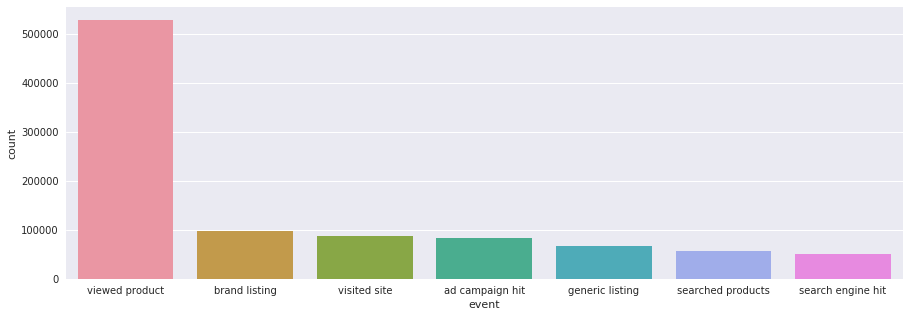

In [25]:
#data = event.value_counts().head(7)
#ax = sns.barplot(x=data.index,y=data)
#ax.set(xlabel='Count',ylabel='Evento')

orden = event.value_counts().head(7).index
sns.countplot(x='event',data=df,order=orden)